In [1]:
using Plots

In [2]:
include("inversion_ext.jl")
methods(f2c!)

# 1 method for generic function "f2c!":
[1] f2c!(R, flu, con, χ) in Main at /Users/reula/Julia/Fluidos_Conformes/inversion_ext.jl:126

## Checking f_to_c

Probamos las versiones alt (no tenemos como chequearlo a esto pues no tenemos valores).

In [3]:
N=10
M=1
χ = [-1.0; -1.0; -5.0]
p = (χ, N, M, f2c!)
u = zeros(N*M)
u0 = zeros(N*M)
println(u)
R = zeros(5)
con = view(reshape(u,(M,N)),:,1:5)
flu = view(reshape(u,(M,N)),:,6:10)
println(flu)
#flu[1,:] = [-1.0, 0.0, 0.3, 1.5, 1.2]
flu[1,:] = [-1.0, 0.2, 1.1, 1.5, 1.2]
println(flu)
con[1,:] = f2c!(R,flu[1,:],con[1,:],χ)
println(R)
println(con[1,:])

con0 = view(reshape(u0,(M,N)),:,1:5)
flu0 = view(reshape(u0,(M,N)),:,6:10)

flu0[1,:] = [-1.0, 0.2, 1.1, 1.5, 1.2]
#con0[1,:] = [0.1366314976448222, 0.07009306769467444, 0.06115332989597844, 0.07178418128379448, 0.04927907295689818]

#println(u0)
println(u)
println(f_to_c!(u0,p) - u)
#println(u0)
#f2c!(R,zeros(5),flu[1,:],χ)
#p
#R

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0 0.0 0.0 0.0 0.0]
[-1.0 0.2 1.1 1.5 1.2]
[11403.233002651888, 9202.42888956158, 1025.3789996381936, 784.3167939570147, 608.8099432677805]
[11403.233002651888, 9202.42888956158, 1025.3789996381936, 784.3167939570147, 608.8099432677805]
[11403.233002651888, 9202.42888956158, 1025.3789996381936, 784.3167939570147, 608.8099432677805, -1.0, 0.2, 1.1, 1.5, 1.2]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


## Checking c_to_f!

In [4]:
tol = 10^(-16)
iter_max = 40
χ = [-1.0; -1.0; -5.0]
M=1
N=10
p_c2f = (χ, tol, iter_max, N, M, f2c!, Jf2c)
p_f2c = (χ, N, M, f2c!)
u = zeros(N*M)
u0 = zeros(N*M)

con = view(reshape(u,(M,N)),:,1:5)
flu = view(reshape(u,(M,N)),:,6:10)

#flu[1,:] = [-2.0, 0.2, 0.1, 0.5, 0.2]

flu[1,:] = [-2.0, 0.2, 0.01, 0.02, 0.03]

f_to_c!(u, p_f2c)

con0 = view(reshape(u0,(M,N)),:,1:5)
flu0 = view(reshape(u0,(M,N)),:,6:10)

flu0[1,:] = flu[1,:] + 0.01.*rand(N÷2)
con0[1,:] = con[1,:]
u-u0
u

10-element Vector{Float64}:
  1.6669004626237607
  0.4920835628217763
  1.135292622303721
  0.7816655290062788
  0.7199113176196454
 -2.0
  0.2
  0.01
  0.02
  0.03

In [5]:
#@time c_to_f!(u0, p_c2f) #- u
c_to_f!(u0, p_c2f) #- u

10-element Vector{Float64}:
  1.6669004626237607
  0.4920835628217763
  1.135292622303721
  0.7816655290062788
  0.7199113176196454
 -1.9999999999999998
  0.20000000000000004
  0.009999999999999995
  0.019999999999999997
  0.029999999999999985

In [6]:
u0 - u

10-element Vector{Float64}:
  0.0
  0.0
  0.0
  0.0
  0.0
  2.220446049250313e-16
  2.7755575615628914e-17
 -5.204170427930421e-18
 -3.469446951953614e-18
 -1.3877787807814457e-17

## Testing with Euler

In [7]:
N=10
M=1
χ = [-1.0; 0.0; -1.0] #put the interaction term to zero
p = (χ, N, M)
u = zeros(N*M)
u0 = zeros(N*M)


con0 = view(reshape(u0,(M,N)),:,1:5)
flu0 = view(reshape(u0,(M,N)),:,6:10)
con = view(reshape(u,(M,N)),:,1:5)
flu = view(reshape(u,(M,N)),:,6:10)

flu0[1,:] = [-10.0, 0.2, 0., 0., 0.]
flu[1,:] = [-10.0, 0.2, 0., 0., 0.]
#flu0[1,:] = [-10.0, 0.2, 1.1, 1.5, 1.2]

println(f_to_c!(u0,p))

LoadError: BoundsError: attempt to access Tuple{Vector{Float64}, Int64, Int64} at index [4]

In [8]:
#flu[1,1] = -flu[1,1]
con[1,:] = F(flu,con,χ)
#flu[1,1] = -flu[1,1];
u

LoadError: UndefVarError: F not defined

In [9]:
con0 = view(reshape(u0,(M,N)),:,1:5)
flu0 = view(reshape(u0,(M,N)),:,6:10)

flu0[1,:] = [-10.0, 0.2, 0,0,0]

println(u0)
println(u)
println(f_to_c!(u,p) - u)
println(u0)

[0.0, 0.0, 0.0, 0.0, 0.0, -10.0, 0.2, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, -10.0, 0.2, 0.0, 0.0, 0.0]


LoadError: BoundsError: attempt to access Tuple{Vector{Float64}, Int64, Int64} at index [4]

In [10]:
@time c_to_f_direct!(u0,p) - u

LoadError: MethodError: no method matching reshape(::Vector{Float64}, ::Tuple{Int64, Vector{Float64}})
[0mClosest candidates are:
[0m  reshape(::AbstractVector{T} where T, [91m::Colon[39m) at reshapedarray.jl:115
[0m  reshape(::AbstractArray{T, N}, [91m::Val{N}[39m) where {T, N} at reshapedarray.jl:139
[0m  reshape(::AbstractArray, [91m::Val{N}[39m) where N at reshapedarray.jl:140
[0m  ...

## Smoothness test

We want to test whether the inversion is or not too noisy.

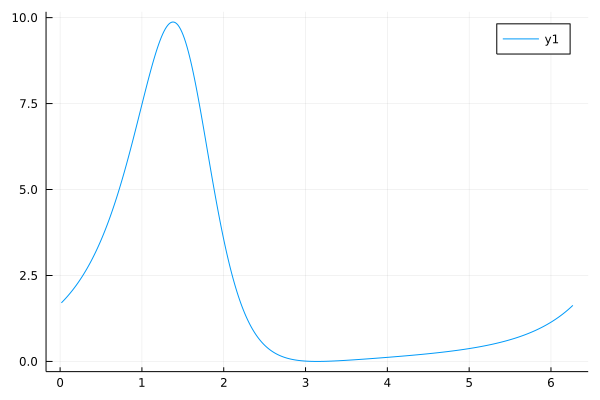

In [68]:
tol = 10^(-7)
iter_max = 10


N = 10
M = 400
u = zeros(N*M)
x = zeros(M)

χ = [-1.0; -0.10; -1.0]
p_c_to_f = (χ, tol, iter_max, N, M, f2c!, Jf2c)
p_f_to_c = (χ, N, M, f2c!)
c = view(reshape(u,(M,N)),:,1:N÷2)
f = view(reshape(u,(M,N)),:,N÷2+1:N)

for j ∈ 1:M
    x[j] = 2π*j/(M+1)
    f[j,1] = -1.0 + 0.7* sin(x[j])
    f[j,2] = 0.1 + 0.1* cos(x[j])
end
 
f_to_c!(u,p_f_to_c)

#plot(c[:,1])

up = zeros(N*M)
cp = view(reshape(up,(M,N)),:,1:N÷2)
fp = view(reshape(up,(M,N)),:,N÷2+1:N)

fp[:,1] = f[:,1] + 0.05 *rand(M);
fp[:,2] = f[:,2] + 0.1 *rand(M);
cp[:,1] = c[:,1]
cp[:,2] = c[:,2];

plot(x,cp[:,2])

In [69]:
maximum(abs, up)

67.56923475016042

In [70]:
fp;

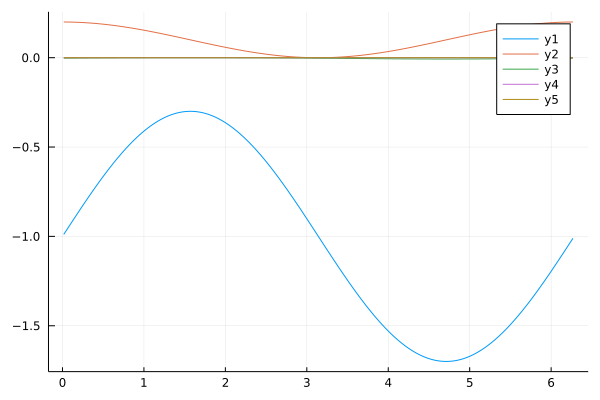

In [71]:
c_to_f!(up,p_c_to_f);
cf = view(reshape(up,(M,N)),:,1:N÷2)
ff = view(reshape(up,(M,N)),:,N÷2+1:N);
plot(x,ff)
plot(x,fp)

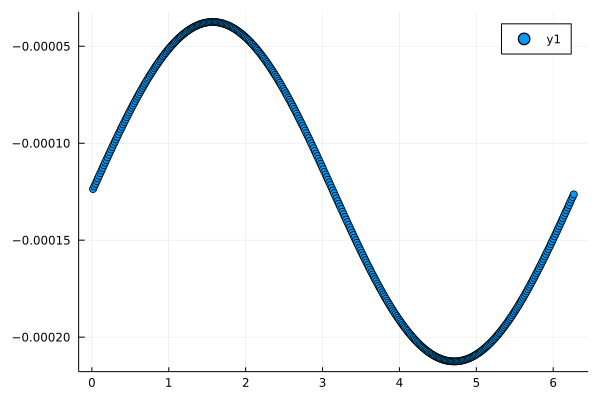

In [72]:
scatter(x,f[:,1]-ff[:,1])

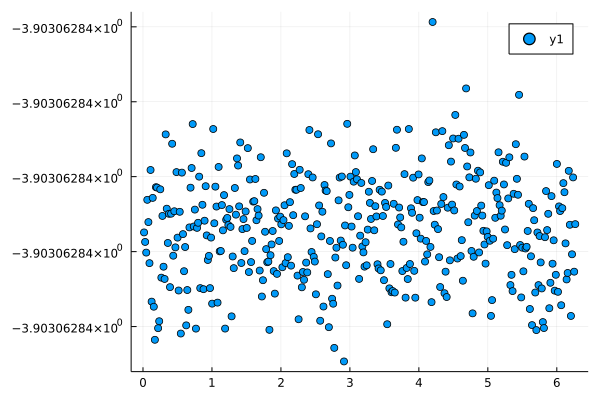

In [74]:
s=1
scatter(x,log10.(abs.(ff[:,1] - f[:,1])./abs.(f[:,s])))

In [25]:
κ =  χ₀*μ^5/(15π*χ₁^2)

LoadError: UndefVarError: μ not defined

In [18]:
λ = -χ₀μ^4/(π*χ₁^2)

LoadError: UndefVarError: χ₀μ not defined